#LOGISTIC REGRESSION

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')

1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

In [51]:
df=pd.read_csv('/content/diabetes.csv')

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.shape

(768, 9)

In [54]:
df.isnull().sum()
###checking null

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [55]:
### check duplicates
df.duplicated().sum()

np.int64(0)

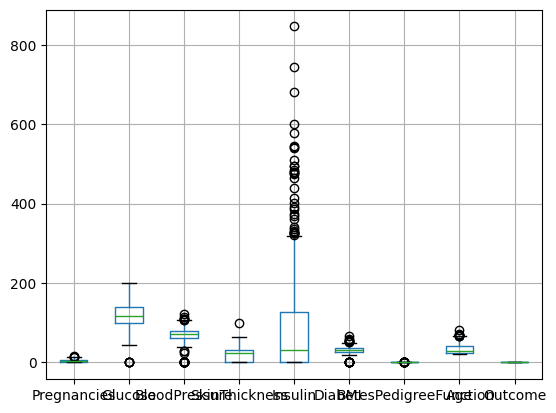

In [56]:
df.boxplot()
plt.show()

In [57]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

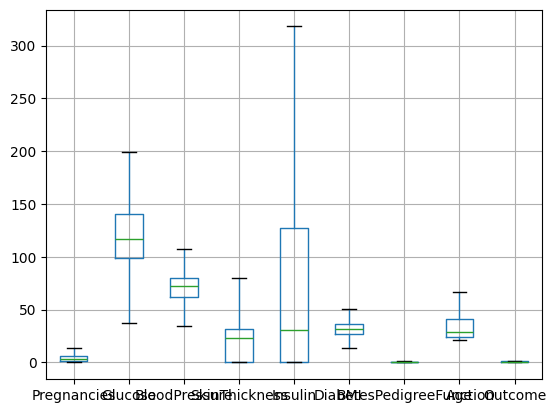

In [58]:
df.boxplot()
plt.show()

b. Examine the features, their types, and summary statistics.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [60]:
### summary statistics
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


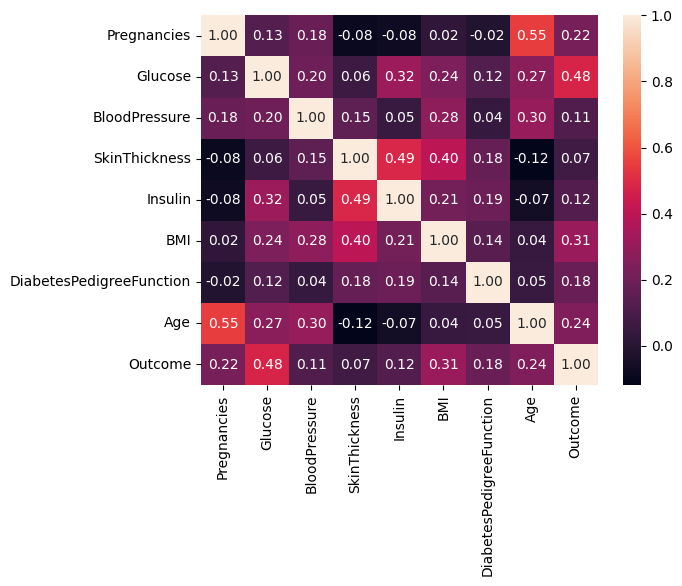

<Figure size 1000x600 with 0 Axes>

In [61]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')
plt.figure(figsize=(10,6))
plt.show()

In [62]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [63]:
f_clas=f_classif(features,target)
f_clas

(array([ 39.1060998 , 228.27899638,   9.96114593,   4.11804863,
         12.10361486,  81.28714654,  27.13587638,  47.94475658]),
 array([6.66677148e-10, 2.46195991e-45, 1.66135754e-03, 4.27732832e-02,
        5.31674632e-04, 1.53959123e-18, 2.43985294e-07, 9.28460495e-12]))

In [64]:
features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

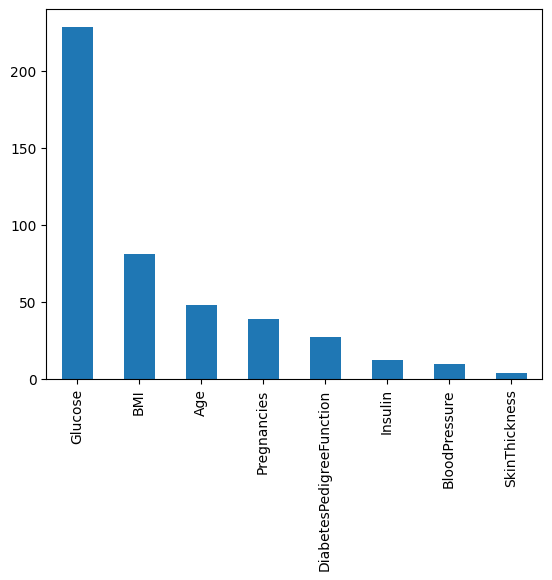

In [65]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [66]:
features.drop(columns=['SkinThickness','BloodPressure','Insulin'],inplace=True)

In [67]:
features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,33.6,0.627,50.0
1,1.0,85.0,26.6,0.351,31.0
2,8.0,183.0,23.3,0.672,32.0
3,1.0,89.0,28.1,0.167,21.0
4,0.0,137.0,43.1,1.200,33.0


In [68]:
features.dtypes

,0
Pregnancies,float64
Glucose,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,float64


c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

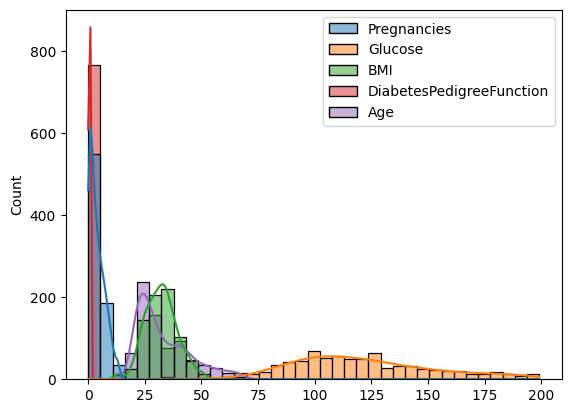

In [69]:
### histogram
sns.histplot(data=features,kde=True)
plt.show()

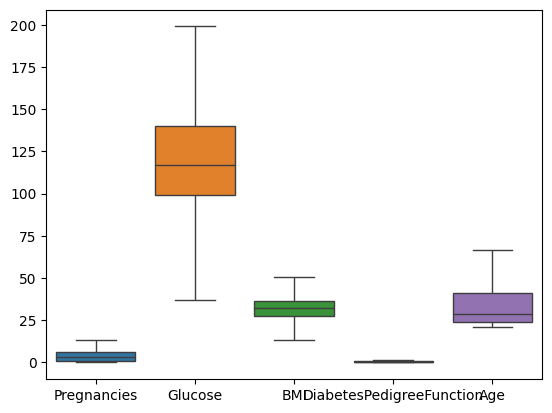

In [70]:
### boxplot
sns.boxplot(data=features)
plt.show()

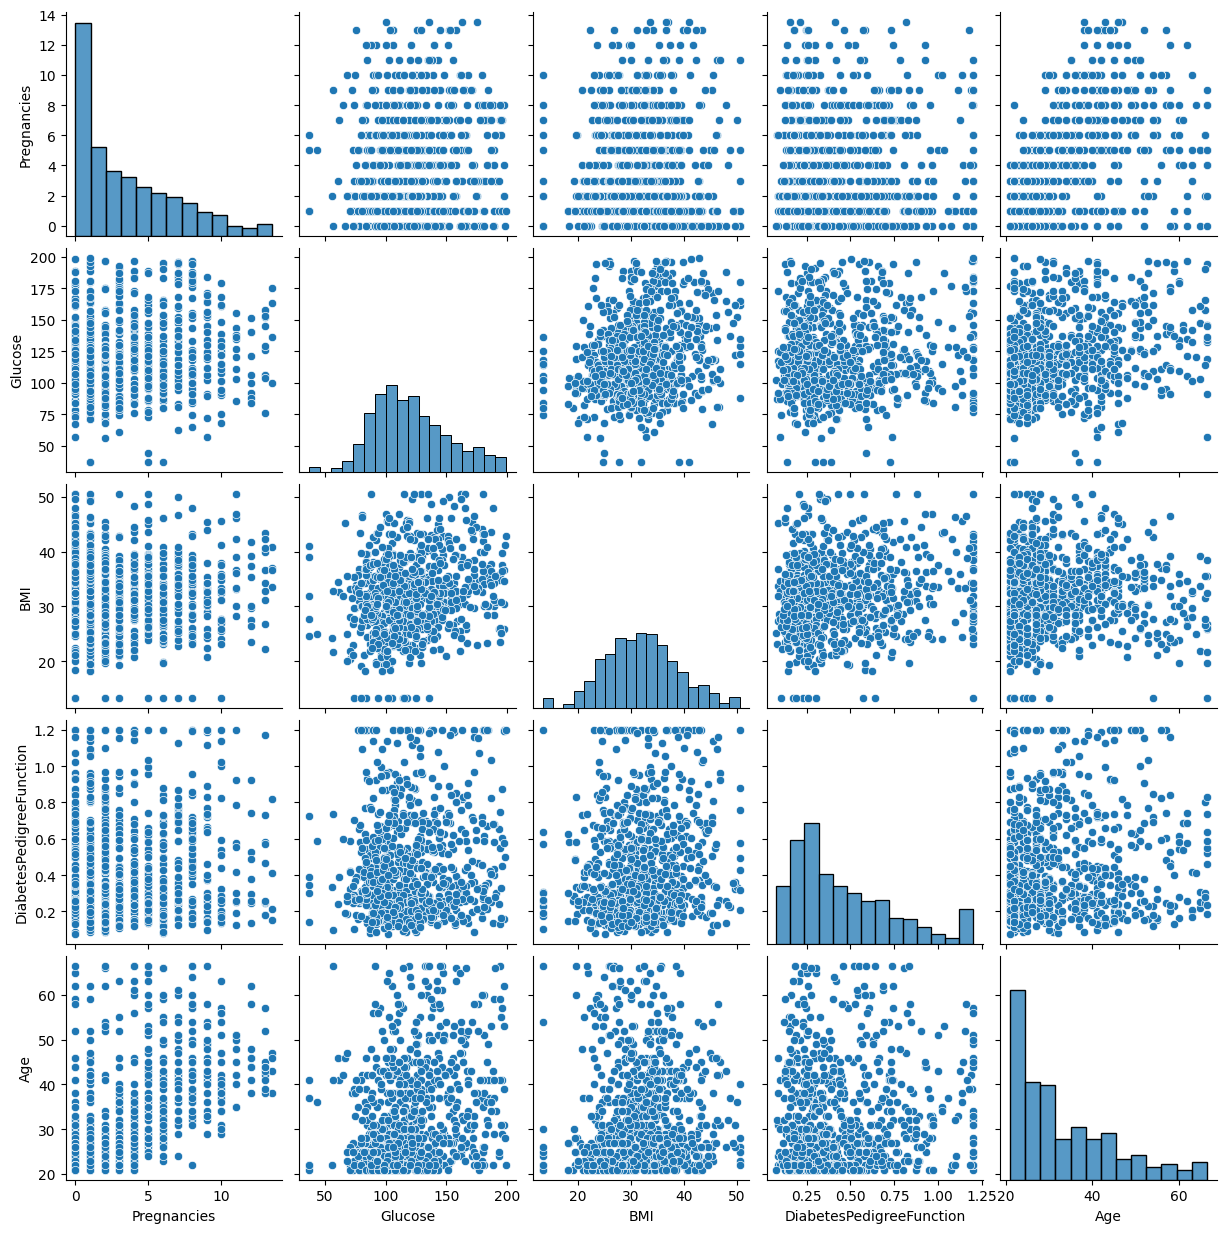

In [71]:
### pairplot
sns.pairplot(features)
plt.show()

##2) Data Preprocessing:

a) Handle missing values (e.g., imputation).

In [72]:
### missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


b) Encode categorical variables

In [73]:
df.dtypes

,0
Pregnancies,float64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,float64
Outcome,int64


In [74]:
### no categorical variables

##3) Model Building

a) Build a logistic regression model using appropriate libraries (e.g., scikit-learn)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 5)
(154, 5)
(614, 1)
(154, 1)


In [76]:
features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,33.6,0.627,50.0
1,1.0,85.0,26.6,0.351,31.0
2,8.0,183.0,23.3,0.672,32.0
3,1.0,89.0,28.1,0.167,21.0
4,0.0,137.0,43.1,1.200,33.0


In [77]:
std_scaler=StandardScaler()
x_train.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,13.35,0.304,21.0
618,9.0,112.0,28.20,1.200,50.0
346,1.0,139.0,28.70,0.654,22.0
294,0.0,161.0,21.90,0.254,65.0
231,6.0,134.0,46.20,0.238,46.0


In [78]:
df['Pregnancies'].unique()

array([ 6. ,  1. ,  8. ,  0. ,  5. ,  3. , 10. ,  2. ,  4. ,  7. ,  9. ,
       11. , 13. , 13.5, 12. ])

In [79]:
x_train[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]=std_scaler.fit_transform(x_train[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']])

In [80]:
x_train.head()


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
60,-0.528662,-1.197609,-2.675470,-0.531720,21.0
618,1.606853,-0.295149,-0.553023,2.644625,50.0
346,-0.833735,0.575081,-0.481560,0.709040,22.0
294,-1.138809,1.284156,-1.453455,-0.708971,65.0
231,0.691632,0.413927,2.019641,-0.765691,46.0


In [81]:
x_test[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]=std_scaler.transform(x_test[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']])


In [82]:
df['Outcome'].unique()

array([1, 0])

In [83]:
x_test.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
668,0.691632,-0.746379,0.275947,-0.085046,43.0
324,-0.528662,-0.295149,0.518921,-1.084744,21.0
624,-0.528662,-0.424071,-0.181416,-1.049294,21.0
690,1.301780,-0.456302,-1.067555,1.425136,34.0
473,0.996706,0.478389,-0.310049,-0.864952,50.0


b. Train the model using the training data.

In [84]:
## It is a binary class
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [85]:
### train validation
y_pred=log_model.predict(x_train)
accuracy_score(y_pred,y_train)

0.7687296416938111

##4) Model Evaluation:

a) Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score

In [86]:
### 4. Model Evaluation
y_pred1=log_model.predict(x_test)
accuracy_score(y_pred1,y_test)

0.7597402597402597

In [87]:
y_test.value_counts()

,count
Outcome,
0,99
1,55


In [88]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       102
           1       0.64      0.67      0.65        52

    accuracy                           0.76       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



ROC curve

In [89]:
### sigmoid value
sigmoid=log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.27915115, 0.16375356, 0.09744051, 0.1965335 , 0.49059045,
       0.47782491, 0.01365925, 0.44411669, 0.5337792 , 0.75365373,
       0.21190826, 0.88700432, 0.36469088, 0.35571904, 0.07568207,
       0.37309973, 0.12500156, 0.07528822, 0.64923573, 0.54395648,
       0.19871315, 0.08965267, 0.45186099, 0.09038047, 0.54088102,
       0.86129796, 0.09390071, 0.03253178, 0.28186503, 0.13824181,
       0.8787079 , 0.86130794, 0.79443317, 0.64814922, 0.68857203,
       0.73164261, 0.94444676, 0.29066779, 0.48219596, 0.46949755,
       0.06072207, 0.5352508 , 0.56469579, 0.314758  , 0.03623892,
       0.59159203, 0.69438597, 0.20142619, 0.3803417 , 0.97060841,
       0.04084739, 0.73488184, 0.86601145, 0.23679779, 0.10253597,
       0.04101229, 0.73132849, 0.00898131, 0.43240078, 0.67968153,
       0.7029025 , 0.30683283, 0.34983005, 0.2832132 , 0.09664833,
       0.59041184, 0.04252013, 0.77989558, 0.04414884, 0.83414652,
       0.73923818, 0.08115207, 0.16594261, 0.12817573, 0.08222

In [90]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.8176308539944903)

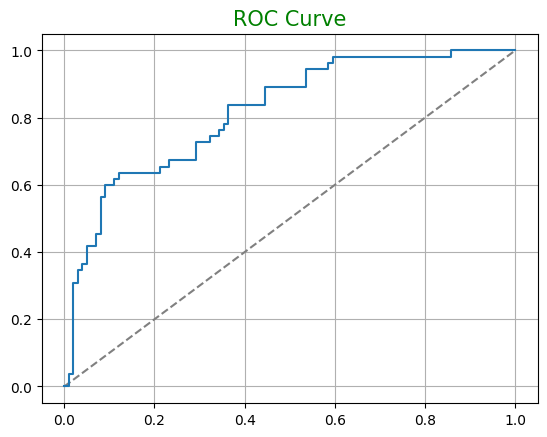

In [91]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot([0,1],linestyle='--',color='grey')
plt.grid()
plt.title("ROC Curve",color="green",size=15)
plt.plot(fpr,tpr)

##5) Interpretation:

a) Interpret the coefficients of the logistic regression model

In [92]:
log_model.coef_

array([[0.18980531, 0.97819229, 0.68309762, 0.25606351, 0.0364384 ]])

b) Discuss the significance of features in predicting the target variable (survival probability in this case).

In [93]:
coefficients = log_model.coef_[0]
feature_names = features.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

In [94]:
print(coef_df.to_string(index=False))

                 Feature  Coefficient
                 Glucose     0.978192
                     BMI     0.683098
DiabetesPedigreeFunction     0.256064
             Pregnancies     0.189805
                     Age     0.036438


Here Glucose is the highest significant feature in predicting the target variable and Age is the lowest significant feature in predicting the target variable ( Diabetics)

##6) Deployment with Streamlit:

In [95]:
file='log30.pkl'

In [96]:
pickle.dump(log_model,open(file,'wb'))

##Interview Questions:

1) What is the difference between precision and recall?

The difference between precision and recall lies in what type of error they prioritize minimizing. Precision answers the question: "Of all the cases the model predicted as positive, how many were actually positive?" and is critical when False Positives (Type I errors) are costly, such as incorrectly flagging a healthy patient as sick. Conversely, Recall (or sensitivity) answers: "Of all the cases that were actually positive, how many did the model correctly identify?" and is critical when False Negatives (Type II errors) are costly, such as failing to identify a truly sick patient.

2) What is cross-validation, and why is it important in binary classification?

Cross-validation (typically $k$-fold) is a technique that divides the dataset into multiple subsets ($k$ folds) and iteratively trains the model on $k-1$ folds while testing it on the remaining fold. It is vital in binary classification because it provides a more robust and unbiased estimate of the model's performance on unseen data, thereby mitigating overfitting. Furthermore, using Stratified k-Fold Cross-Validation ensures that each fold maintains the same ratio of positive to negative cases, which is crucial for getting a reliable evaluation when dealing with class imbalance.